# Trabajo Final Inteligencia Artificial I - año 2018: Visión Artificial
---

# [Dependencias y resultados previos](./03-segmentacion.ipynb)

## Dependencias

In [1]:
import numpy as np

from matplotlib import pyplot as plt
plt.rcParams['image.cmap'] = 'gray'

from skimage import io, color, img_as_float, img_as_ubyte, filters

import cv2

In [2]:
def img2gray(image, mode='sk'):
    if (mode=='sk'):
        gray = color.rgb2gray(image)
    elif (mode=='cv'):
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return gray

def normSize(image, size=(tuple((400, 300)))):
    image = cv2.resize(image, size)
    return image

def imgClean(image, sigma=1, mode='sk'):
    if (mode == 'sk'):
        clean = filters.gaussian(image, sigma)
    elif (mode == 'cv'):
        clean = cv2.GaussianBlur(img, (3, 3), 0)
    return clean

def imgEdge(image, mode='sk'):
    if (mode == 'sk'):
        edge = filters.sobel(image)
    elif (mode == 'cv'):
        edge = cv2.Laplacian(image, cv2.CV_64F)
    return edge

def threshold(image, mode='sk'):
    if (mode == 'sk'):
        th = filters.threshold_isodata(image)
    elif (mode == 'cv'):
        ret, th = cv.threshold(image, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
    return (image < th)

## Resultados

Text(0.5,1,'threshold isodata')

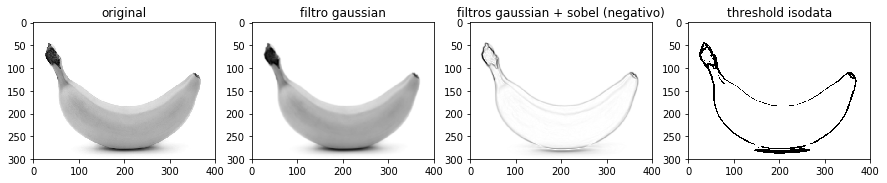

In [3]:
img = io.imread('./examples/banana_example.jpg')

img = normSize(img)

banana = img2gray(img)
gray = img2gray(img, mode='cv')


bg1 = imgClean(banana)
bc1 = imgEdge(bg1)

bf = threshold(bc1)

fig, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, figsize=(15, 15))
ax0.imshow(banana)
ax0.set_title('original')
ax1.imshow(bg1)
ax1.set_title('filtro gaussian')
ax2.imshow(-bc1)
ax2.set_title('filtros gaussian + sobel (negativo)')
ax3.imshow(bf)
ax3.set_title('threshold isodata')

---
# Extracción de características
---

La extracción de características de la imágen filtrada y/o segmentada es el último paso, previo a los algoritmos de clasificación.

La extracción consiste en obtener valores numéricos característicos de la imagen que serán la entrada a los algoritmos _K-means_ y _K-nn_.

Esta étapa es muy importante ya que sentará las bases para la posterior clasificación. En lo posible se deberían obtener características tales que pueda diferenciarse conjuntos entre las diferentes clases. Es por esto que en este punto se comienza a analizar la base de datos como conjunto y no solo una imagen ejemplo.

## Base de datos

In [23]:
banana = io.ImageCollection('./data/banana/*.png:./data/banana/*.jpg')
orange = io.ImageCollection('./data/orange/*.png:./data/orange/*.jpg')
lemon = io.ImageCollection('./data/lemon/*.png:./data/lemon/*.jpg')

banana_gray = []
banana_n = []
banana_edge = []

orange_gray = []
orange_n = []
orange_edge = []

lemon_gray = []
lemon_n = []
lemon_edge = []

i = 0
for i in range(0, len(banana)-1):
    aux = normSize(banana[i])
    # aux = imgClean(aux, mode='cv')
    banana_n.append(aux)
    banana_gray.append(img2gray(banana_n[i], mode='cv'))
    banana_edge.append(imgEdge(banana_gray[i]))

i = 0
for i in range(0, len(orange)-1):
    aux = normSize(orange[i])
    # aux = imgClean(aux, mode='cv')
    orange_n.append(aux)
    orange_gray.append(img2gray(orange_n[i], mode='cv'))
    orange_edge.append(imgEdge(orange_gray[i]))

i = 0
for i in range(0, len(lemon)-1):
    aux = normSize(lemon[i])
    # aux = imgClean(aux, mode='cv')
    lemon_n.append(aux)
    lemon_gray.append(img2gray(lemon_n[i], mode='cv'))
    lemon_edge.append(imgEdge(lemon_gray[i]))

## Histograma de Gradientes Orientados (HOG)

Se utiliza el algoritmo **HOG** porque la documentación indica que es muy adecuada y popular para reconocimiento de objetos.

In [24]:
from skimage.feature import hog

def m_hog(image):
    feature = hog(image, block_norm='L2-Hys').ravel()
    return feature

### Entre tres bananas diferentes

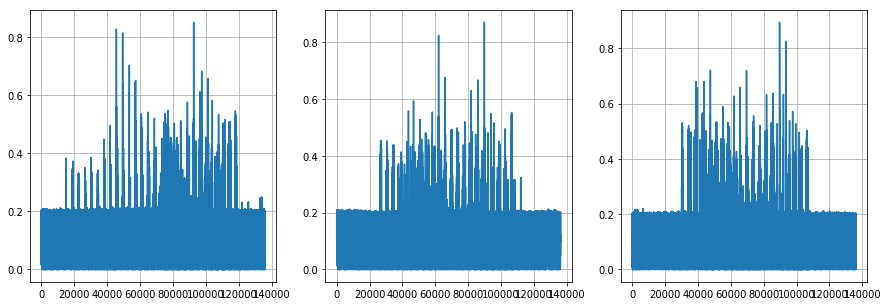

In [25]:
b1_fhog = m_hog(banana_gray[0])
b2_fhog = m_hog(banana_gray[1])
b3_fhog = m_hog(banana_gray[2])

f, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(15, 5))

ax0.plot(b1_fhog)
ax1.plot(b2_fhog)
ax2.plot(b3_fhog)

ax0.grid(True)
ax1.grid(True)
ax2.grid(True)

### Entre banana, naranja y limón

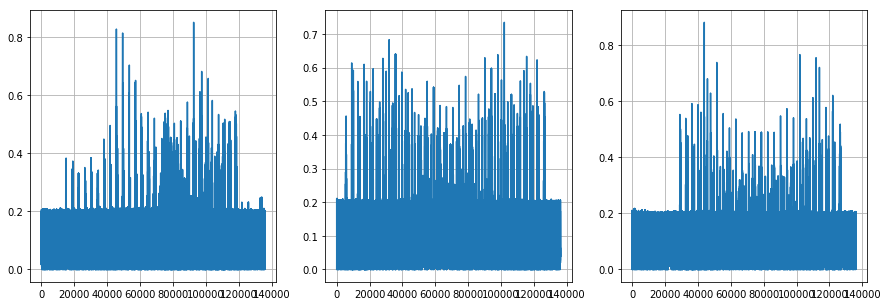

In [26]:
b_fhog = m_hog(banana_gray[0])
o_fhog = m_hog(orange_gray[0])
l_fhog = m_hog(lemon_gray[0])

f, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(15, 5))

ax0.plot(b_fhog)
ax1.plot(o_fhog)
ax2.plot(l_fhog)

ax0.grid(True)
ax1.grid(True)
ax2.grid(True)

## Hu Moments

Extracción de características _Hu Moments_ mediante módulo _cv2_. Para la extracción recibe la imágen en escala de grises.

In [27]:
def hu_moments(image):
    feature = cv2.HuMoments(cv2.moments(image)).flatten()
    return feature

### Entre tres bananas diferentes

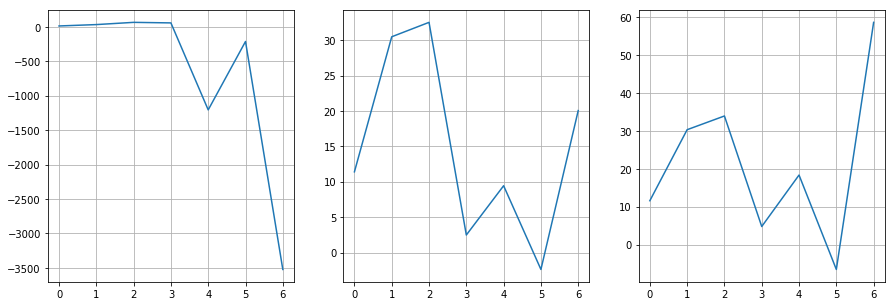

In [28]:
b1_fhm = hu_moments(banana_edge[0])
b2_fhm = hu_moments(banana_edge[1])
b3_fhm = hu_moments(banana_edge[2])

f, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(15, 5))

ax0.plot(b1_fhm)
ax1.plot(b2_fhm)
ax2.plot(b3_fhm)

ax0.grid(True)
ax1.grid(True)
ax2.grid(True)

### Entre banana, naranja y limón

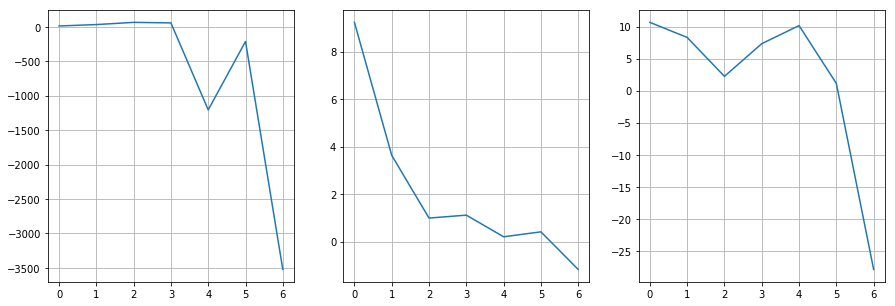

In [29]:
b_fhm = hu_moments(banana_edge[0])
o_fhm = hu_moments(orange_edge[0])
l_fhm = hu_moments(lemon_edge[0])

f, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(15, 5))

ax0.plot(b_fhm)
ax1.plot(o_fhm)
ax2.plot(l_fhm)

ax0.grid(True)
ax1.grid(True)
ax2.grid(True)

## Haralick Textures

Extracción de características _Haralick Texture_ mediante módulo _mahotas_. Para la extracción recibe la imagen en escala de grises.

In [30]:
import mahotas

def haralick(image):
    feature = mahotas.features.haralick(image).mean(axis=0)
    return feature

### Entre tres banana diferentes

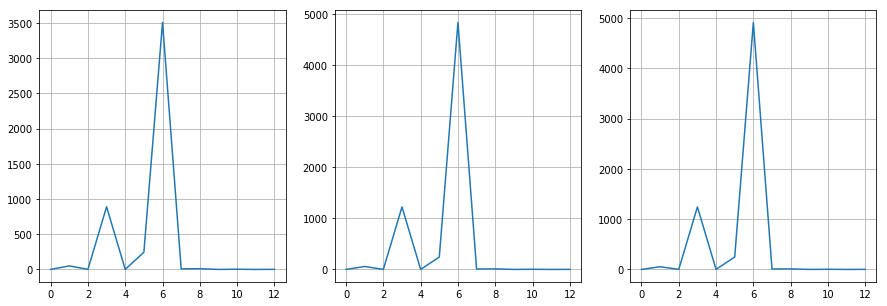

In [31]:
b1_fht = haralick(banana_gray[0])
b2_fht = haralick(banana_gray[1])
b3_fht = haralick(banana_gray[2])

f, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(15, 5))

ax0.plot(b1_fht)
ax1.plot(b2_fht)
ax2.plot(b3_fht)

ax0.grid(True)
ax1.grid(True)
ax2.grid(True)

### Entre banana, naranja y limón

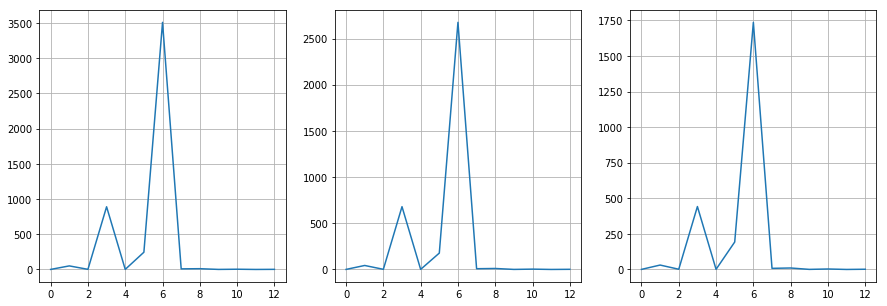

In [32]:
b_fht = haralick(banana_gray[0])
o_fht = haralick(orange_gray[0])
l_fht = haralick(lemon_gray[0])

f, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(15, 5))

ax0.plot(b_fht)
ax1.plot(o_fht)
ax2.plot(l_fht)

ax0.grid(True)
ax1.grid(True)
ax2.grid(True)

## Color Histogram

Extracción de características de histograma de color mediante módulo _cv2_. Para la extracción recibe la imagen a color original e internamente hace una conversión a formato HSV con _cv2_

In [33]:
def color_histogram(image, mask=None, bins=8):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([image], [0, 1, 2], None, [bins, bins, bins],
                        [0, 256, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    feature = hist.flatten()
    return feature

### Entre tres bananas diferentes

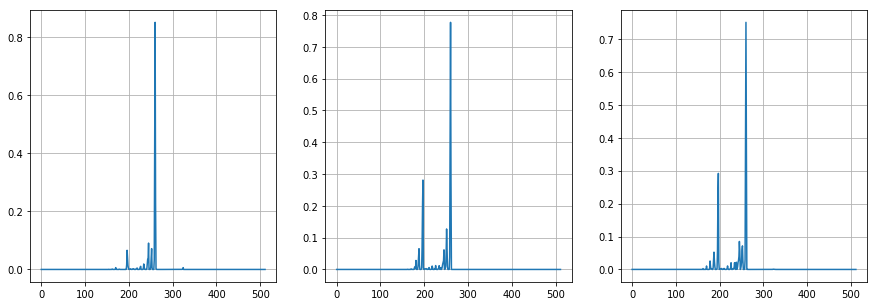

In [34]:
b1_fch = color_histogram(banana_n[0])
b2_fch = color_histogram(banana_n[1])
b3_fch = color_histogram(banana_n[2])

f, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(15, 5))

ax0.plot(b1_fch)
ax1.plot(b2_fch)
ax2.plot(b3_fch)

ax0.grid(True)
ax1.grid(True)
ax2.grid(True)

### Entre banana, naranja y limón

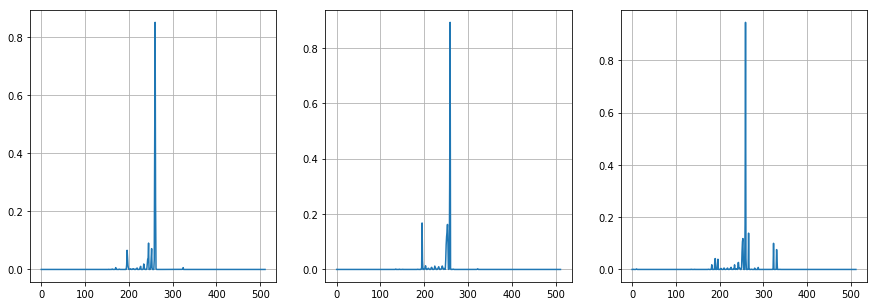

In [35]:
b_fch = color_histogram(banana_n[0])
o_fch = color_histogram(orange_n[0])
l_fch = color_histogram(lemon_n[0])

f, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(15, 5))

ax0.plot(b_fch)
ax1.plot(o_fch)
ax2.plot(l_fch)

ax0.grid(True)
ax1.grid(True)
ax2.grid(True)

## Reducción de dimensión

Una de las primeras dificultades que sale a la luz al realizar éste análisis es la magnitud de la dimensión de los vectores de características (sobretodo para _HOG_ y _color histogram_ ).

Para intentar reducirla, una de las ideas es tomar parámetros estadísticos de los diferentes vectores que describan su magnitud y dispersión. Por ejemplo, la **media aritmética** y la **desviación estándar**.

In [36]:
def stats(arr):
    
    sum = 0
    for value in arr:
        sum += value
    med = sum / len(arr)
    sum = 0
    for value in arr:
        sum += np.power((value - med), 2)
    dstd = np.sqrt(sum / (len(arr) - 1))
    
    return med, dstd

In [19]:
import matplotlib.patches as mpatches

### Histograma de Gradientes Orientados (HOG)

Text(0.5,0,'media aritmética')

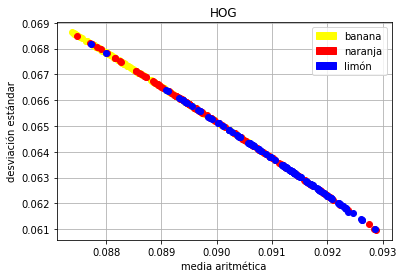

In [37]:
#f, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize = (15, 5))
fig_hog, ax = plt.subplots()

for fruit in banana_gray:
    b_fhog = m_hog(fruit)
    med, dstd = stats(b_fhog)
    ax.plot(med, dstd, 'o', color='yellow')
#ax0.set_title('banana haralick textures')
    
for fruit in orange_gray:
    o_fhog = m_hog(fruit)
    med, dstd = stats(o_fhog)
    ax.plot(med, dstd, 'o', color='red')
#ax1.set_title('orange haralick textures')
    
for fruit in lemon_gray:
    l_fhog = m_hog(fruit)
    med, dstd = stats(l_fhog)
    ax.plot(med, dstd, 'o', color='blue')
#ax2.set_title('lemon haralick textures')

ax.grid(True)
ax.set_title("HOG")

yellow_patch = mpatches.Patch(color='yellow', label='banana')
red_patch = mpatches.Patch(color='red', label='naranja')
blue_patch = mpatches.Patch(color='blue', label='limón')
plt.legend(handles=[yellow_patch, red_patch, blue_patch])

plt.ylabel('desviación estándar')
plt.xlabel('media aritmética')

### Hu Moments

Text(0.5,0,'media aritmética')

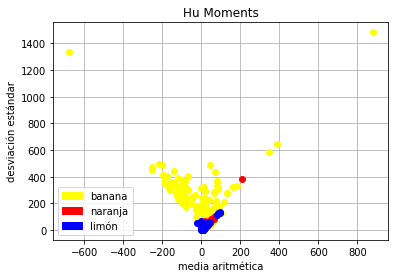

In [38]:
#f, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize = (15, 5))
fig_hm, ax = plt.subplots()

for fruit in banana_edge:
    b_fhm = hu_moments(fruit)
    med, dstd = stats(b_fhm)
    ax.plot(med, dstd, 'o', color='yellow')
#ax0.set_title('banana haralick textures')
    
for fruit in orange_edge:
    o_fhm = hu_moments(fruit)
    med, dstd = stats(o_fhm)
    ax.plot(med, dstd, 'o', color='red')
#ax1.set_title('orange haralick textures')
    
for fruit in lemon_edge:
    l_fhm = hu_moments(fruit)
    med, dstd = stats(l_fhm)
    ax.plot(med, dstd, 'o', color='blue')
#ax2.set_title('lemon haralick textures')

ax.grid(True)
ax.set_title("Hu Moments")

yellow_patch = mpatches.Patch(color='yellow', label='banana')
red_patch = mpatches.Patch(color='red', label='naranja')
blue_patch = mpatches.Patch(color='blue', label='limón')
plt.legend(handles=[yellow_patch, red_patch, blue_patch])

plt.ylabel('desviación estándar')
plt.xlabel('media aritmética')

In [65]:
from mpl_toolkits.mplot3d import Axes3D

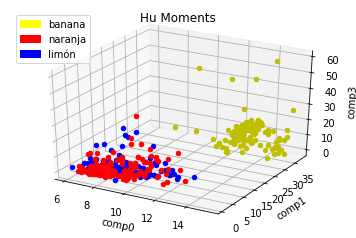

In [79]:
#f, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize = (15, 5))
#fig_hm, ax = plt.subplots()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

a = 0
b = 1
c = 3

for fruit in banana_edge:
    b_fhm = hu_moments(fruit)
    # med, dstd = stats(b_fhm)
    ax.scatter(b_fhm[a], b_fhm[b], b_fhm[c], c='y', marker='o')
#ax0.set_title('banana haralick textures')
    
for fruit in orange_edge:
    o_fhm = hu_moments(fruit)
    # med, dstd = stats(o_fhm)
    ax.scatter(o_fhm[a], o_fhm[b], o_fhm[c], c='r', marker='o')
#ax1.set_title('orange haralick textures')
    
for fruit in lemon_edge:
    l_fhm = hu_moments(fruit)
    # med, dstd = stats(l_fhm)
    ax.scatter(l_fhm[a], l_fhm[b], l_fhm[c], c='b', marker='o')
#ax2.set_title('lemon haralick textures')

ax.grid(True)
ax.set_title("Hu Moments")

yellow_patch = mpatches.Patch(color='yellow', label='banana')
red_patch = mpatches.Patch(color='red', label='naranja')
blue_patch = mpatches.Patch(color='blue', label='limón')
plt.legend(handles=[yellow_patch, red_patch, blue_patch])


ax.set_xlabel('comp0')
ax.set_ylabel('comp1')
ax.set_zlabel('comp3')

plt.show()

### Haralick Textures

Text(0.5,0,'media aritmética')

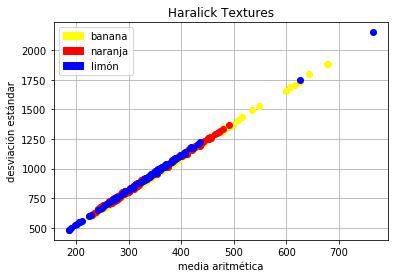

In [34]:
#f, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize = (15, 5))
fig_ht, ax = plt.subplots()

for fruit in banana_gray:
    b_fht = haralick(fruit)
    med, dstd = stats(b_fht)
    ax.plot(med, dstd, 'o', color='yellow')
#ax0.set_title('banana haralick textures')
    
for fruit in orange_gray:
    o_fht = haralick(fruit)
    med, dstd = stats(o_fht)
    ax.plot(med, dstd, 'o', color='red')
#ax1.set_title('orange haralick textures')
    
for fruit in lemon_gray:
    l_fht = haralick(fruit)
    med, dstd = stats(l_fht)
    ax.plot(med, dstd, 'o', color='blue')
#ax2.set_title('lemon haralick textures')

ax.grid(True)
ax.set_title("Haralick Textures")

yellow_patch = mpatches.Patch(color='yellow', label='banana')
red_patch = mpatches.Patch(color='red', label='naranja')
blue_patch = mpatches.Patch(color='blue', label='limón')
plt.legend(handles=[yellow_patch, red_patch, blue_patch])

plt.ylabel('desviación estándar')
plt.xlabel('media aritmética')

### Color Histogram

Text(0.5,0,'media aritmética')

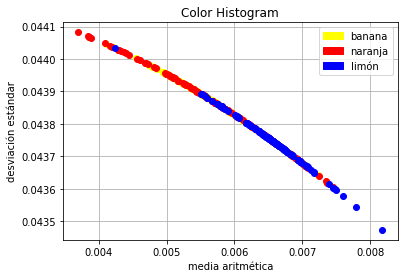

In [35]:
#f, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize = (15, 5))
fig_ch, ax = plt.subplots()

for fruit in banana_n:
    b_fch = color_histogram(fruit)
    med, dstd = stats(b_fch)
    ax.plot(med, dstd, 'o', color='yellow')
#ax0.set_title('banana haralick textures')
    
for fruit in orange_n:
    o_fch = color_histogram(fruit)
    med, dstd = stats(o_fch)
    ax.plot(med, dstd, 'o', color='red')
#ax1.set_title('orange haralick textures')
    
for fruit in lemon_n:
    l_fch = color_histogram(fruit)
    med, dstd = stats(l_fch)
    ax.plot(med, dstd, 'o', color='blue')
#ax2.set_title('lemon haralick textures')

ax.grid(True)
ax.set_title("Color Histogram")

yellow_patch = mpatches.Patch(color='yellow', label='banana')
red_patch = mpatches.Patch(color='red', label='naranja')
blue_patch = mpatches.Patch(color='blue', label='limón')
plt.legend(handles=[yellow_patch, red_patch, blue_patch])

plt.ylabel('desviación estándar')
plt.xlabel('media aritmética')

# Resultados
---

A continuación se define una función que resume el proceso de extracción de características utilizando las funciones anteriores:

In [1]:
def ft_extract(image):
    image = normSize(image)
    aux = img2grey(image, mode='cv')
    # aux = imgClean(aux, mode='cv')

    # image_fht = haralick(aux)
    image_fhm = hu_moments(aux)
    # image_fch = color_histogram(image)
    # image_fhog = m_hog(aux)

    # feature = np.hstack([image_fht, image_fhm, image_fhog])
    med, dstd = stats(image_fhm)
    # feature = feature.reshape(1, -1)

    return aux, [med, dstd]